In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales_df = pd.read_csv('supermarket_sales.csv')
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Checking shape
sales_df.shape

(1000, 17)

In [4]:
# Checking for null values
sales_df.info()
# So there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

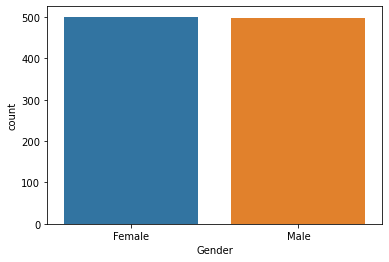

In [5]:
# Checking the gender count of the data set
sns.countplot('Gender',data=sales_df)
# We see the data set has equal males and females

In [6]:
# Which month had the highest sales
sales_df['Month'] = sales_df['Date'].apply(lambda x: x.split('/')[0])
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [7]:
# Now checking which month had the greatest revenue
months_sales  = DataFrame(sales_df.groupby('Month',as_index=False)['Total'].sum())
months_sales
# So for three months these are the whole revenues

,Month,Total
0,1,116291.868
1,2,97219.374
2,3,109455.507


<AxesSubplot:xlabel='Month'>

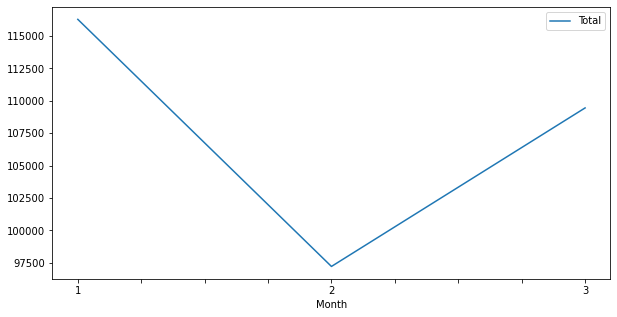

In [8]:
# Plotting the data
months_sales.plot('Month','Total',figsize=(10,5))
# The sales just dropped in february

In [7]:
# Checking the unique product lines
sales_df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

<AxesSubplot:>

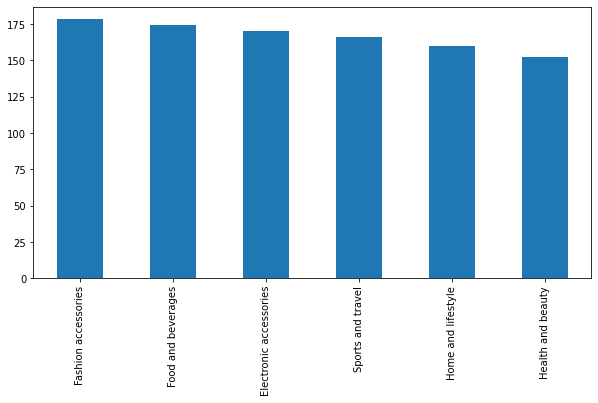

In [8]:
# seeing the data
sales_df['Product line'].value_counts().plot(kind="bar", figsize=(10,5))

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product line', ylabel='count'>

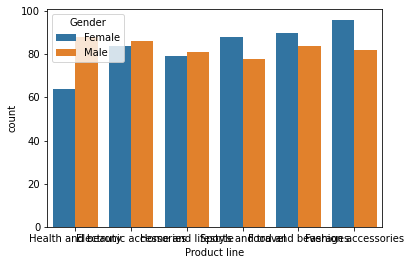

In [9]:
# Seeing the difference in the below chart between males and females
# First converting the males and females into numeric values
sns.countplot('Product line',data=sales_df,hue='Gender')
# Women lead in fashio accessories

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

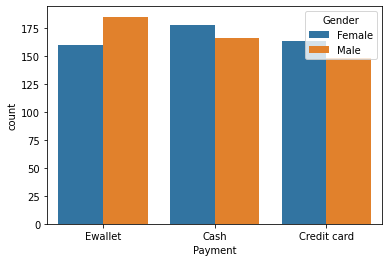

In [10]:
# Checking how many used Cash, Credit and Ewallet
sns.countplot('Payment',hue='Gender',data=sales_df)

In [10]:
# Now cheking which hour made the most total
sales_df['Hour'] = sales_df['Time'].apply(lambda x: x.split(':')[0])
sales_df['Hour'] = pd.to_numeric(sales_df['Hour'],downcast='integer')
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,10


<AxesSubplot:xlabel='Hour', ylabel='Total'>

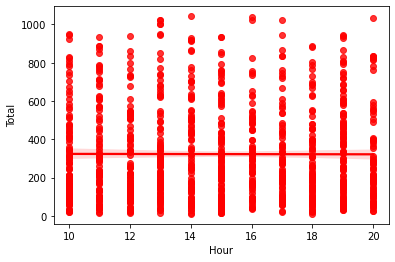

In [11]:
# Now plotting the hours and total item sold at that hour
sns.regplot(x='Hour',y='Total',data=sales_df,color='red')

In [12]:
# Plotting the whole price before tax and after tax
sales_df['Price inc'] =( sales_df['Total'] - sales_df['cogs'] ) / 100

<AxesSubplot:xlabel='Product line'>

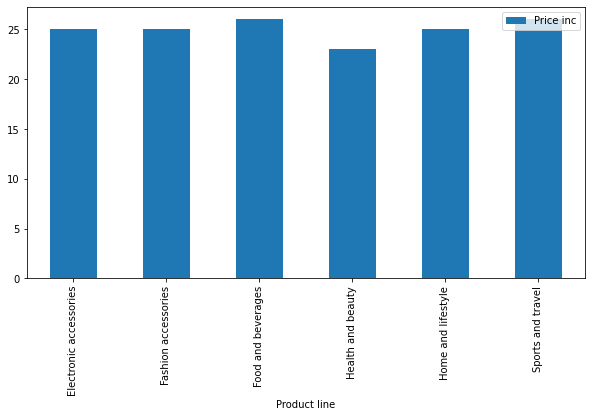

In [80]:
# Plotting the percent increase in percentage of tax per cogs
price_df = DataFrame(sales_df.groupby('Product line',as_index=False)['Price inc'].sum())
price_df['Price inc'] = price_df['Price inc'].astype(int)
price_df.plot(x='Product line',kind="bar", figsize=(10,5))

In [21]:
# Cheking which Branch earned the most
branch_df = DataFrame(sales_df.groupby('Branch',as_index=False)['Total'].sum())
branch_df

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


<AxesSubplot:xlabel='Branch'>

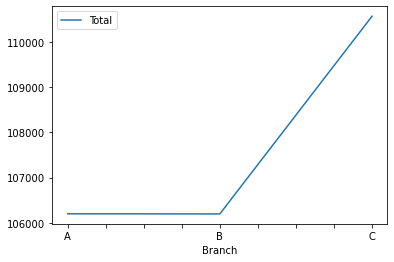

In [23]:
branch_df.plot('Branch','Total')
# Branch C did better in total sales

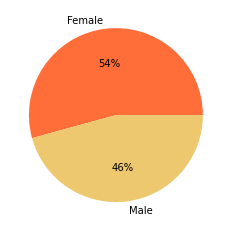

In [47]:
# Seeing how much percentage of the total sales in C is spent by males and females
c_df = DataFrame(sales_df[sales_df.Branch == 'C'])
counts = [c_df['Gender'].value_counts()[0],c_df['Gender'].value_counts()[1]]
labels = ['Female','Male']
colors = sns.color_palette('rainbow_r')[0:5]
plt.pie(counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()